# Cleaning and exploration

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import glob
import missingno as msno
import seaborn as sns

In [2]:
sns.set_theme(style="ticks", palette="Pastel2")

## 1) Exploring the books datasets

In [3]:
# importing different files and 
# concatenating in one dataset
filepath = 'Datasets/books'

all_files = glob.glob(filepath + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename)
    li.append(df)

merged_books = pd.concat(li,
                        axis=0,
                        ignore_index=True)
merged_books.head()

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,...,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,PagesNumber,Description,pagesNumber,Count of text reviews
0,4000000,Top Management,Bernard Taylor,0582446058,0.00,1973,1,1,Longman Publishing Group,5:0,...,3:0,2:0,1:0,total:0,0,NaN,448.0,NaN,NaN,NaN
1,4000001,"Celtic Warfare, 1595 1763",James Michael Hill,0859761517,3.67,1986,1,1,J. Donald,5:1,...,3:0,2:1,1:0,total:3,0,NaN,203.0,NaN,NaN,NaN
2,4000002,Playwright Power,Robert Friedman,0761803629,0.00,1996,7,28,University Press of America,5:0,...,3:0,2:0,1:0,total:0,0,NaN,164.0,Playwright Power is a concise handbook on how ...,NaN,NaN
3,4000009,Selected Topics In Harmonic Maps,James Eells,0821807005,0.00,1983,1,1,American Mathematical Society(RI),5:0,...,3:0,2:0,1:0,total:0,0,NaN,85.0,Gives an account of the various aspects of the...,NaN,NaN
4,4000010,Foreign Exchange Intervention: Objectives And ...,Sylvester C.W. Eijffinger,1858988128,0.00,1999,1,1,Edward Elgar Publishing,5:0,...,3:0,2:0,1:0,total:0,0,NaN,608.0,This collection of previously published articl...,NaN,NaN


<AxesSubplot:>

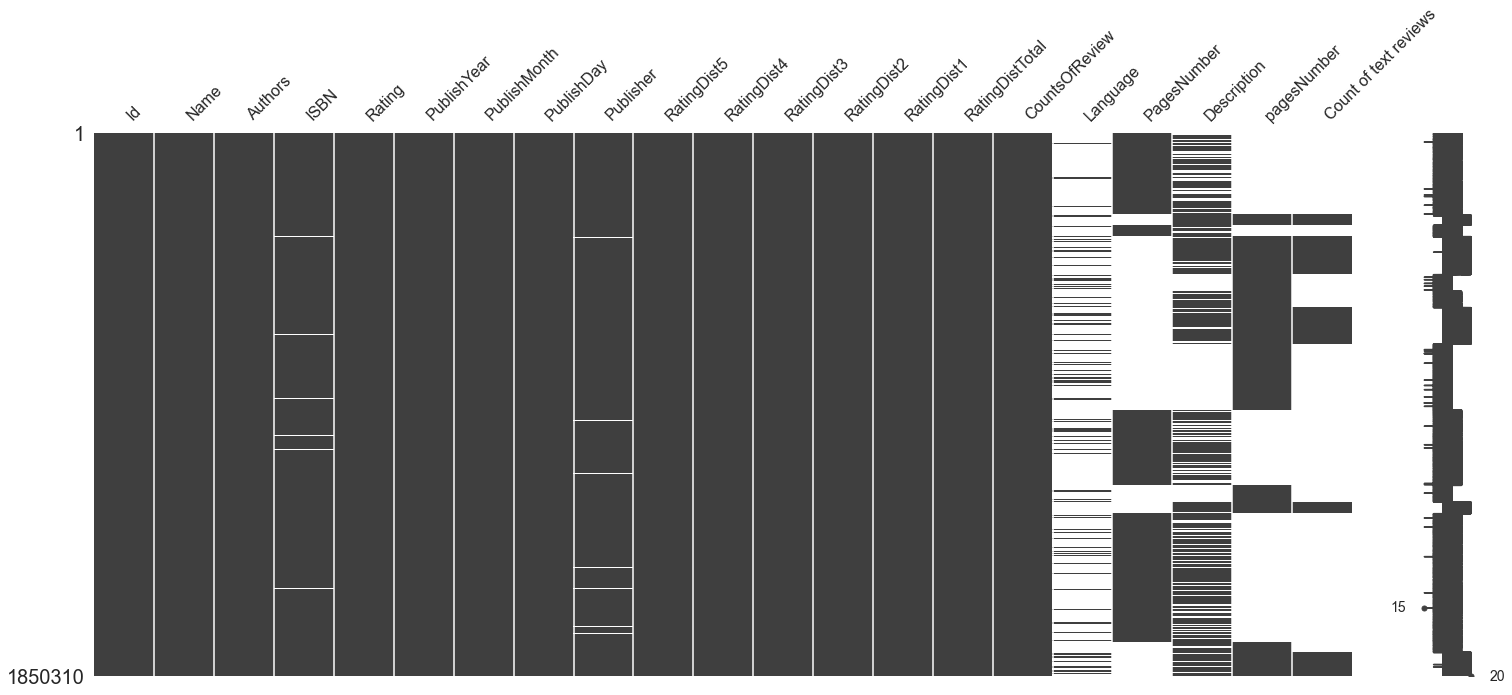

In [4]:
# Identify missing values
msno.matrix(merged_books)

In [5]:
merged_books["NumberOfPages"] = merged_books["PagesNumber"].fillna(0) + merged_books["pagesNumber"].fillna(0)

In [6]:
# deleting columns abouut publish day, month and ratingdists
merged_books.drop(["PublishMonth", "PublishDay",
                   "RatingDist5", "RatingDist4",
                   "RatingDist3", "RatingDist3",
                   "RatingDist2", "RatingDist1",
                   "RatingDistTotal", "PagesNumber",
                   "pagesNumber"], axis=1,
                   inplace=True)

In [7]:
merged_books.head()

,Id,Name,Authors,ISBN,Rating,PublishYear,Publisher,CountsOfReview,Language,Description,Count of text reviews,NumberOfPages
0,4000000,Top Management,Bernard Taylor,0582446058,0.00,1973,Longman Publishing Group,0,NaN,NaN,NaN,448.0
1,4000001,"Celtic Warfare, 1595 1763",James Michael Hill,0859761517,3.67,1986,J. Donald,0,NaN,NaN,NaN,203.0
2,4000002,Playwright Power,Robert Friedman,0761803629,0.00,1996,University Press of America,0,NaN,Playwright Power is a concise handbook on how ...,NaN,164.0
3,4000009,Selected Topics In Harmonic Maps,James Eells,0821807005,0.00,1983,American Mathematical Society(RI),0,NaN,Gives an account of the various aspects of the...,NaN,85.0
4,4000010,Foreign Exchange Intervention: Objectives And ...,Sylvester C.W. Eijffinger,1858988128,0.00,1999,Edward Elgar Publishing,0,NaN,This collection of previously published articl...,NaN,608.0


### a) Numerical variables

In this part, we explore informations about numerical variables. These variables are the year of publication, the average ratings of each books, the number of ratings, the number of pages and the number of reviews.

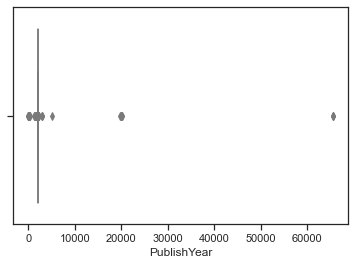

In [8]:
sns.boxplot(x="PublishYear", data=merged_books)
plt.show()

In [9]:
# dropping data where year of publication is less than 1820 & more than 2019
ind = merged_books.loc[(merged_books["PublishYear"] <= 1820) | (merged_books["PublishYear"] >= 2019)].index.to_list()
merged_books.drop(index=ind, inplace=True)

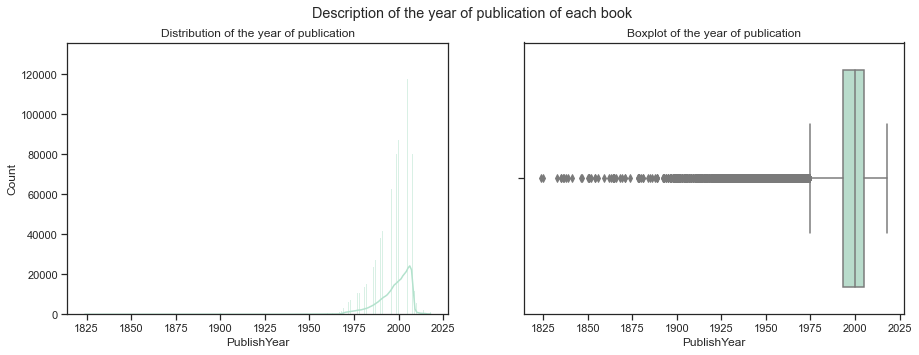

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Description of the year of publication of each book')

sns.histplot(ax=axes[0], x="PublishYear", data=merged_books, kde=True)
axes[0].set_title("Distribution of the year of publication")

sns.boxplot(ax=axes[1], x="PublishYear", data=merged_books)
axes[1].set_title("Boxplot of the year of publication")

plt.show()

After cleaning, only books with a year of publication between 1825 and 2019 were conserved. The majority of the books had been published between 1975 et 2019. The aveerage is around 2000. 

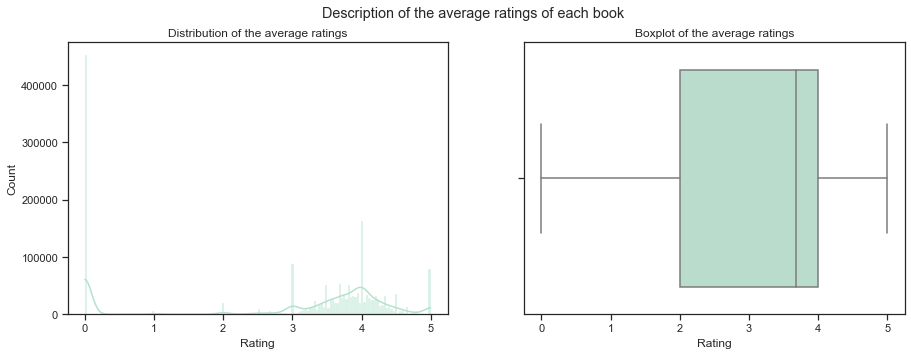

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Description of the average ratings of each book')

sns.histplot(ax=axes[0], x="Rating", data=merged_books, kde=True)
axes[0].set_title("Distribution of the average ratings")

sns.boxplot(ax=axes[1], x="Rating", data=merged_books)
axes[1].set_title("Boxplot of the average ratings")

plt.show()

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Description of the number of pages of each book')

sns.histplot(ax=axes[0], x="NumberOfPages", data=merged_books, kde=True)
axes[0].set_title("Distribution of the number of pages")

sns.boxplot(ax=axes[1], x="NumberOfPages", data=merged_books)
axes[1].set_title("Boxplot of the number of pages")

plt.show()